# Loading Packages

In [1]:
import os
import torch
from utils.visualize       import visualize_images_from_classes
from utils.datasets        import returnDataLoader, returnFeatureLoaderFromDisk, process_and_save_features_parallel
from utils.model_execution import runFMA, runDLA, runKBA
from utils.analysis        import print_analysis

/home/sysop/programming/python/work/HistoART/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.xpu.is_available():
    device = torch.device("xpu")
elif torch.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: xpu


# Load Patches

In [3]:
test = True

if(test):
    data_dir = './data/combined/'
    classes  = ['artifact_free', 'blur']

else:
    while True:
        data_dir = input("Please enter the dataset directory, for example: ./data/: ") or "./data/combined/"

        if not os.path.isdir(data_dir):
            print(f"Directory '{data_dir}' does not exist. Please try again.\n")
            continue
        print("\nDataset directory confirmed.\n")

        break

    classes            = []
    artifact_free      = input("Please enter the name of the artifact free folder (e.g., artifact_free): ").strip()
    artifact_free_path = os.path.join(data_dir, artifact_free)

    if artifact_free and os.path.isdir(artifact_free_path):
        classes.append(artifact_free)
        print(f"Folder '{artifact_free_path}' exists and was added as artifact free.")
    else:
        if artifact_free:
            print(f"Folder '{artifact_free_path}' does not exist. Please check the name.")

    artifact      = input("Please enter the name of the artifact folder (e.g., artifact): ").strip()
    artifact_path = os.path.join(data_dir, artifact)

    if artifact and os.path.isdir(artifact_path):
        classes.append(artifact)
        print(f"Folder '{artifact_path}' exists and was added as artifact.")
    else:
        if artifact:
            print(f"Folder '{artifact_path}' does not exist. Please check the name.")

    if classes:
        print("\nDataset loaded successfully.")
    else:
        print("\nNo valid class folders were provided. Defaulting to sample classes.")
        classes = ['artifact_free', 'blur']


# Random visualization of different classes

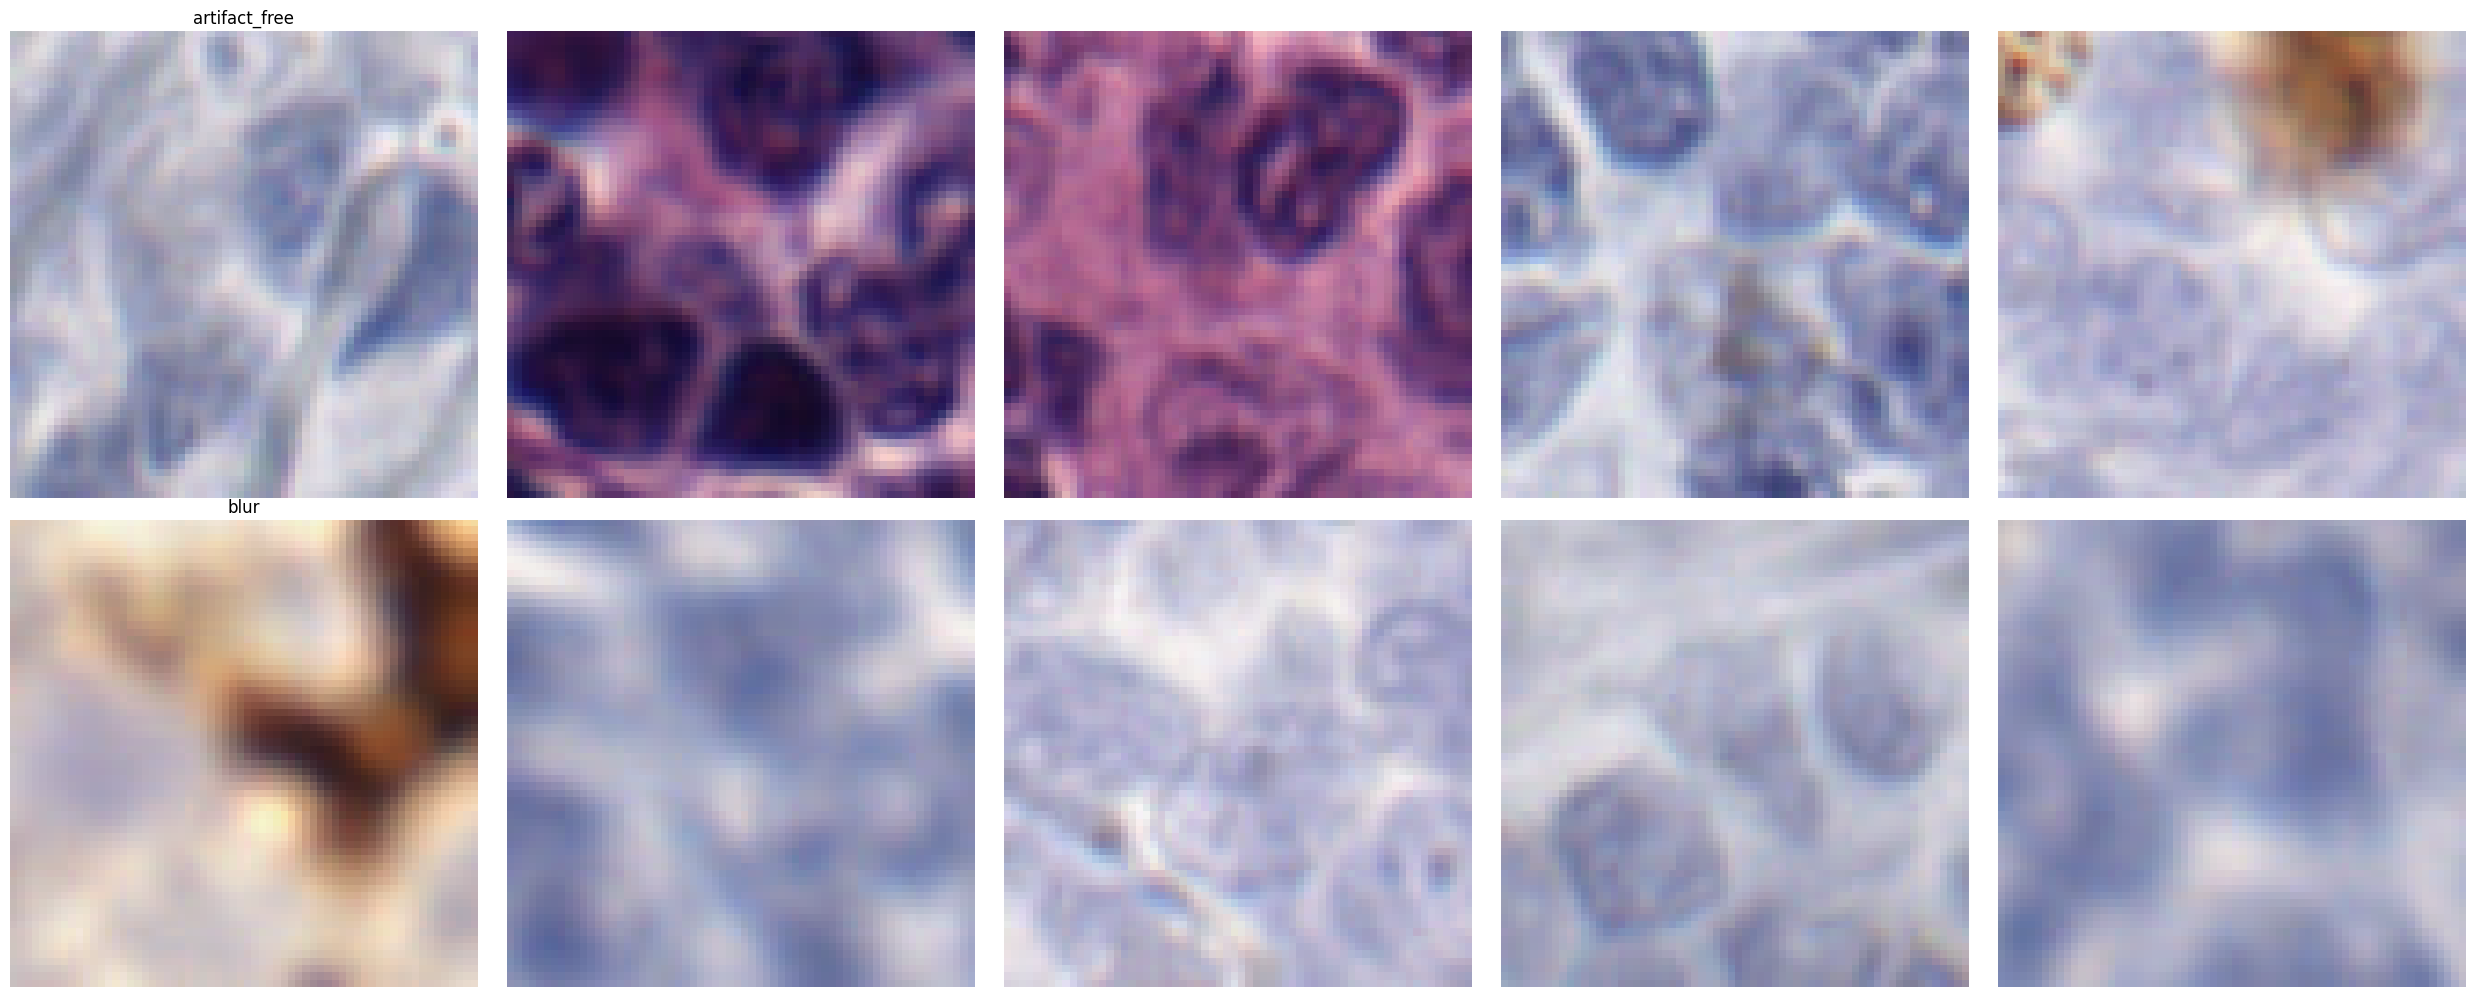

In [4]:
visualize_images_from_classes(data_dir, classes)

# Prepare data for classification

In [5]:
fma_dataloader = returnDataLoader(data_dir, classes, 32)
print("Total dataset size (samples): ", len(fma_dataloader.dataset))

dla_dataloader = returnDataLoader(data_dir, classes, 128)
print("Total dataset size (samples): ", len(dla_dataloader.dataset))


Total dataset size (samples):  222495
Total dataset size (samples):  222495


# Classify images with different models

### FMA

In [ ]:
runFMA(fma_dataloader, device, './models/fma_binary_blur.pth')

/home/sysop/programming/python/work/HistoART/utils/model_execution.py:156: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  uni_model.load_state_dict(torch.load(model, map_loca

### DLA

In [ ]:
runDLA(dla_dataloader, device, './models/dla_binary.pth')

### KBA

In [ ]:
process_and_save_features_parallel(data_dir, './features/')
feature_loader = returnFeatureLoaderFromDisk('./features')
print("Total dataset size (samples): ", len(feature_loader.dataset))

runKBA(feature_loader, './models/kba_binary.pkl')

# Analysis

In [ ]:
print_analysis('./results/fma_results.csv')
print_analysis('./results/dla_results.csv')
print_analysis('./results/kba_results.csv')